In [12]:
import os
import imageio
from glob import glob
import numpy as np

In [1]:

DIR = "H:\\download\\deepLearning\\datasets\\keelYolo\\allBrown"

xray_image = imageio.v3.imread(os.path.join(DIR, "02023SG3.jpg"))

In [2]:
print(xray_image.shape)
print(xray_image.dtype)

(2240, 1748, 3)
uint8


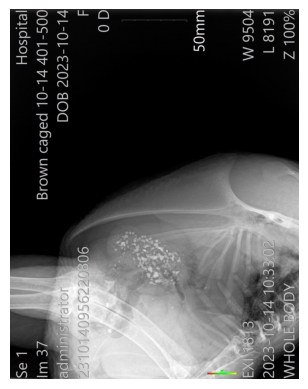

In [3]:
import matplotlib.pyplot as plt

plt.imshow(xray_image, cmap="gray")
plt.axis("off")
plt.show()

In [22]:
num_imgs = 9
pattern_path = DIR + "/*jpg"
images = sorted(glob(os.path.join(pattern_path)))

combined_xray_images_1 = np.array(
    [imageio.v3.imread(images[i]) for i in range(10)]
)
combined_xray_images_1.shape


C:\Users\jach\AppData\Local\Temp\ipykernel_5016\1790669474.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  combined_xray_images_1 = np.array(


(10,)

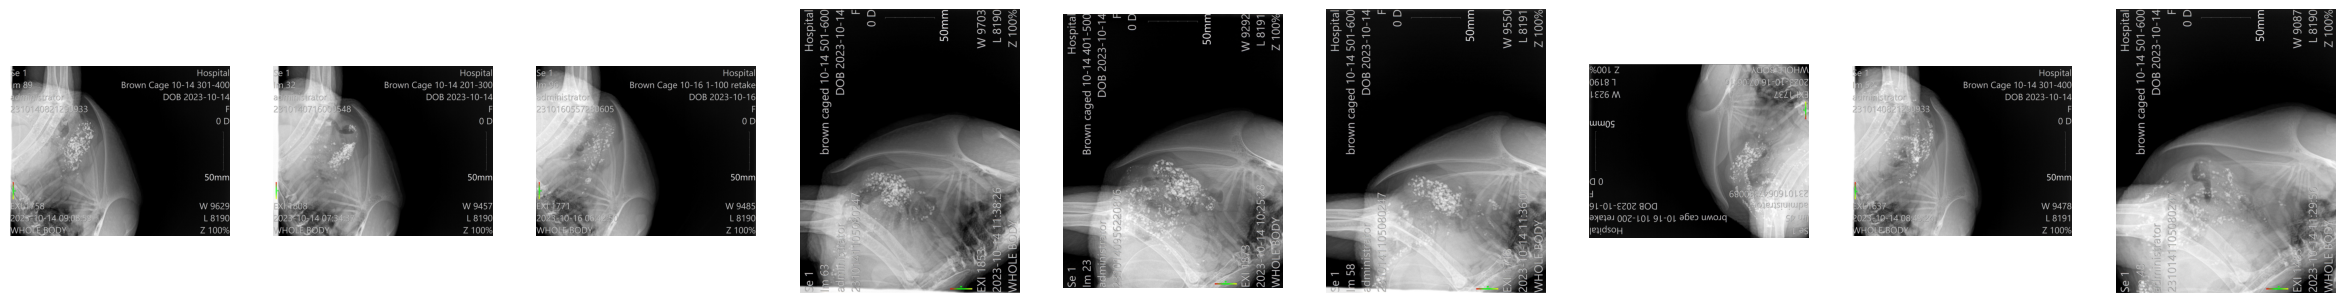

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=num_imgs, figsize=(30, 30))

for img, ax in zip(combined_xray_images_1, axes):
    ax.imshow(img, cmap='gray')
    ax.axis('off')

In [ ]:
#GIF_PATH = os.path.join(DIR, "xray_image.gif")
#imageio.mimwrite(GIF_PATH, combined_xray_images_1, format= ".gif", duration=1000)

In [27]:
from scipy import ndimage

xray_image_laplace_gaussian = ndimage.gaussian_laplace(xray_image, sigma=1)

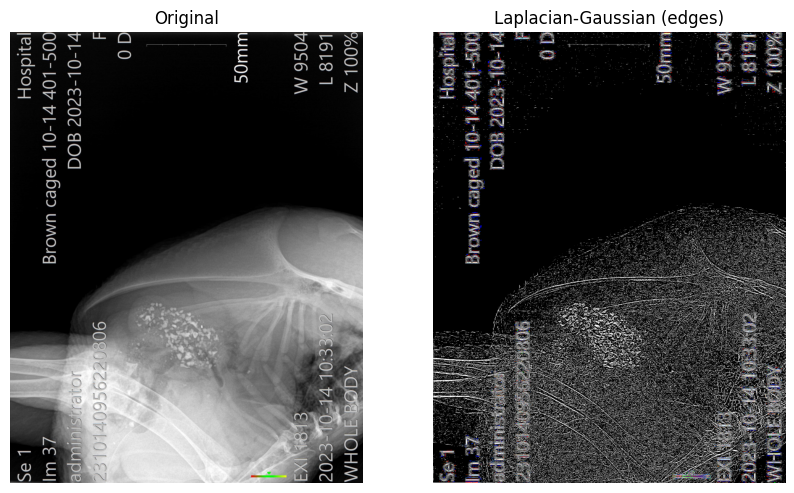

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

axes[0].set_title("Original")
axes[0].imshow(xray_image, cmap="gray")
axes[1].set_title("Laplacian-Gaussian (edges)")
axes[1].imshow(xray_image_laplace_gaussian, cmap="gray")
for i in axes:
    i.axis("off")
plt.show()

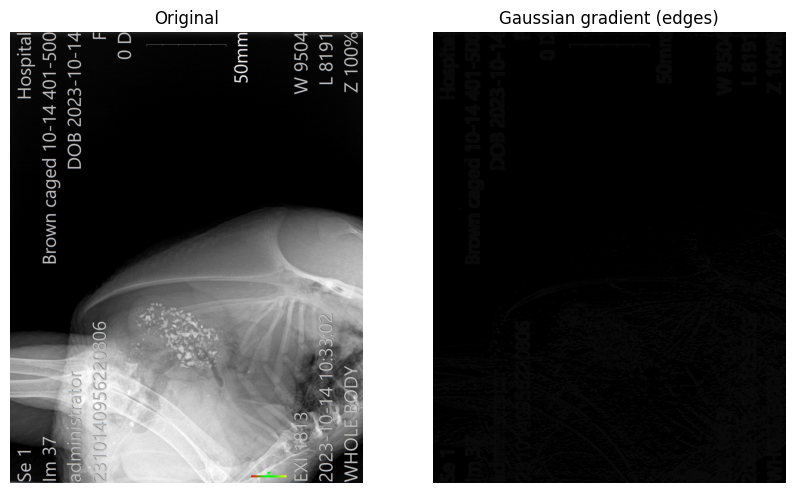

In [29]:
x_ray_image_gaussian_gradient = ndimage.gaussian_gradient_magnitude(xray_image, sigma=2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

axes[0].set_title("Original")
axes[0].imshow(xray_image, cmap="gray")
axes[1].set_title("Gaussian gradient (edges)")
axes[1].imshow(x_ray_image_gaussian_gradient, cmap="gray")
for i in axes:
    i.axis("off")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The data type - before:  float16
The data type - after:  float32


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


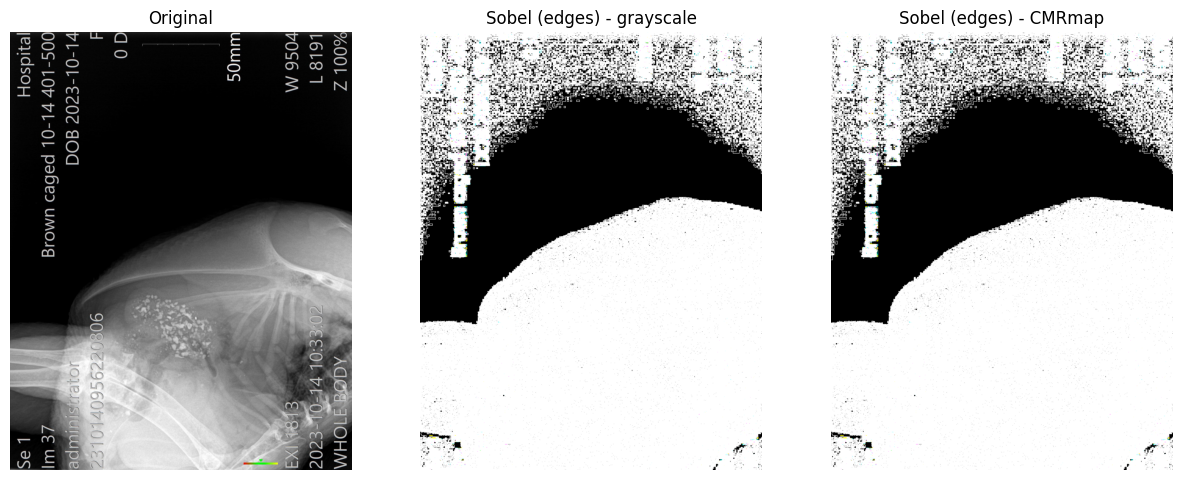

In [30]:
x_sobel = ndimage.sobel(xray_image, axis=0)
y_sobel = ndimage.sobel(xray_image, axis=1)

xray_image_sobel = np.hypot(x_sobel, y_sobel)

xray_image_sobel *= 255.0 / np.max(xray_image_sobel)


print("The data type - before: ", xray_image_sobel.dtype)

xray_image_sobel = xray_image_sobel.astype("float32")

print("The data type - after: ", xray_image_sobel.dtype)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))

axes[0].set_title("Original")
axes[0].imshow(xray_image, cmap="gray")
axes[1].set_title("Sobel (edges) - grayscale")
axes[1].imshow(xray_image_sobel, cmap="gray")
axes[2].set_title("Sobel (edges) - CMRmap")
axes[2].imshow(xray_image_sobel, cmap="CMRmap")
for i in axes:
    i.axis("off")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The data type -  float64


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


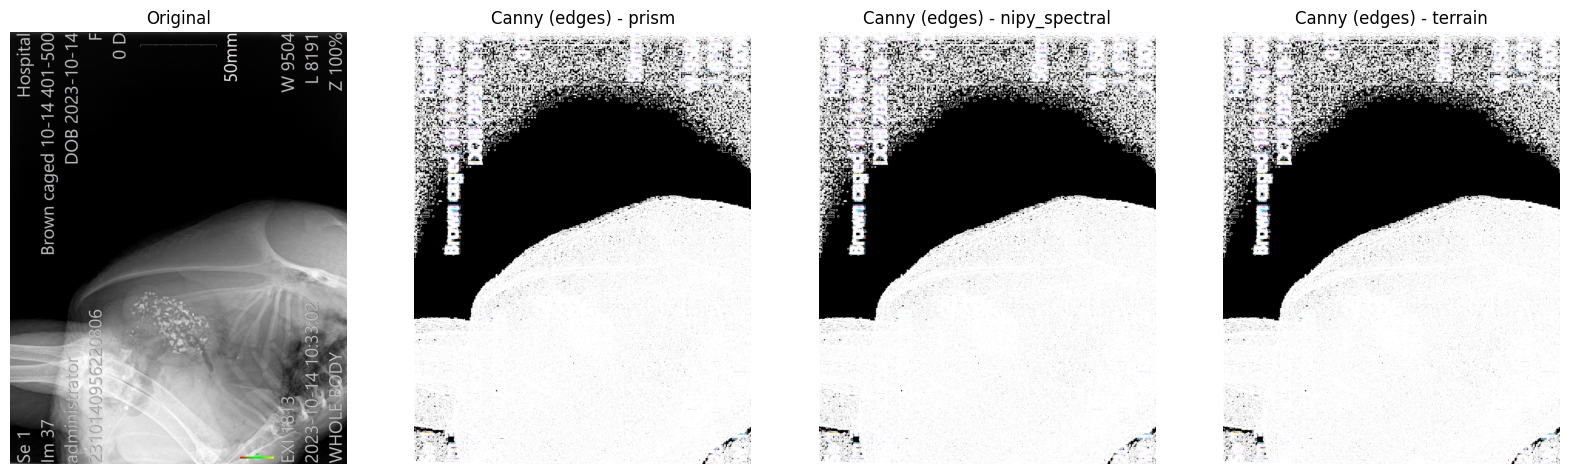

In [31]:
fourier_gaussian = ndimage.fourier_gaussian(xray_image, sigma=0.05)

x_prewitt = ndimage.prewitt(fourier_gaussian, axis=0)
y_prewitt = ndimage.prewitt(fourier_gaussian, axis=1)

xray_image_canny = np.hypot(x_prewitt, y_prewitt)

xray_image_canny *= 255.0 / np.max(xray_image_canny)

print("The data type - ", xray_image_canny.dtype)

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 15))

axes[0].set_title("Original")
axes[0].imshow(xray_image, cmap="gray")
axes[1].set_title("Canny (edges) - prism")
axes[1].imshow(xray_image_canny, cmap="prism")
axes[2].set_title("Canny (edges) - nipy_spectral")
axes[2].imshow(xray_image_canny, cmap="nipy_spectral")
axes[3].set_title("Canny (edges) - terrain")
axes[3].imshow(xray_image_canny, cmap="terrain")
for i in axes:
    i.axis("off")
plt.show()

The data type of the X-ray image is:  uint8
The minimum pixel value is:  0
The maximum pixel value is:  255
The average pixel value is:  74.65822649354364
The median pixel value is:  35.0


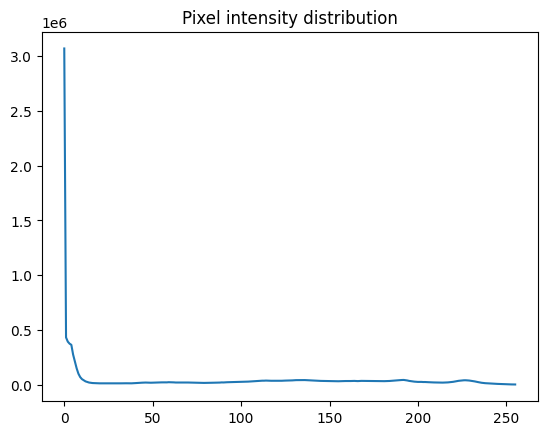

In [33]:
print("The data type of the X-ray image is: ", xray_image.dtype)
print("The minimum pixel value is: ", np.min(xray_image))
print("The maximum pixel value is: ", np.max(xray_image))
print("The average pixel value is: ", np.mean(xray_image))
print("The median pixel value is: ", np.median(xray_image))

pixel_intensity_distribution = ndimage.histogram(
    xray_image, min=np.min(xray_image), max=np.max(xray_image), bins=256
)

plt.plot(pixel_intensity_distribution)
plt.title("Pixel intensity distribution")
plt.show()

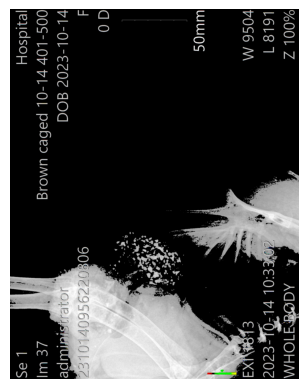

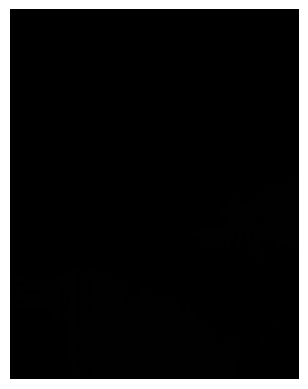

In [34]:
# The threshold is "greater than 150"
# Return the original image if true, `0` otherwise
xray_image_mask_noisy = np.where(xray_image > 150, xray_image, 0)

plt.imshow(xray_image_mask_noisy, cmap="gray")
plt.axis("off")
plt.show()
# The threshold is "greater than 150"
# Return `1` if true, `0` otherwise
xray_image_mask_less_noisy = np.where(xray_image > 150, 1, 0)

plt.imshow(xray_image_mask_less_noisy, cmap="gray")
plt.axis("off")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


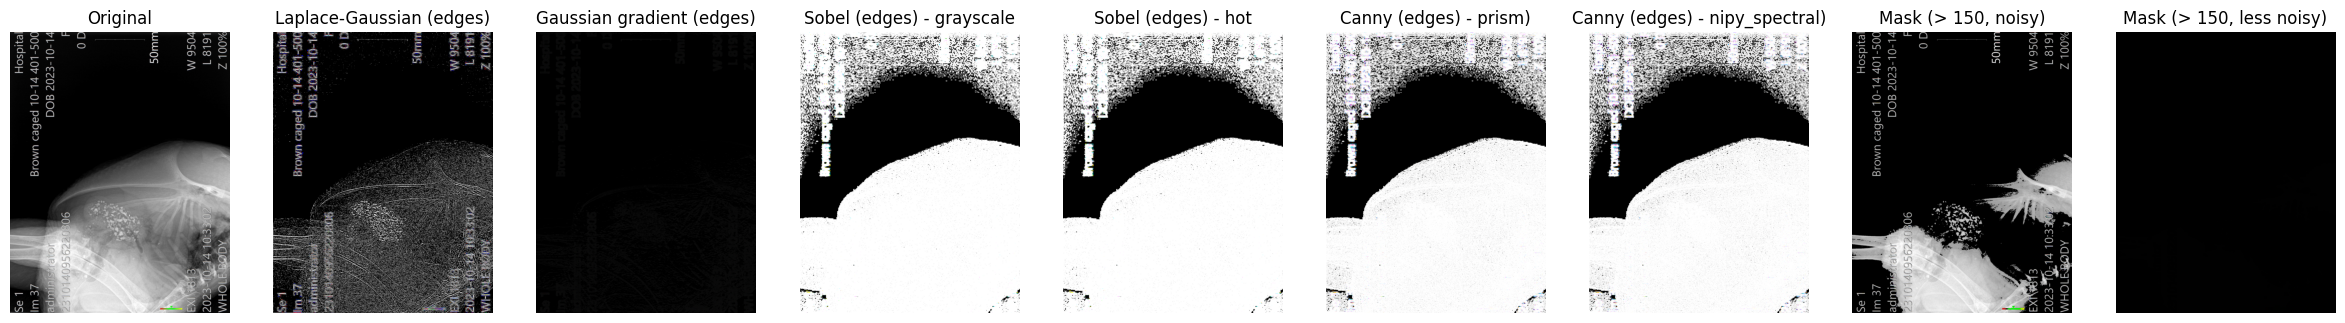

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=9, figsize=(30, 30))

axes[0].set_title("Original")
axes[0].imshow(xray_image, cmap="gray")
axes[1].set_title("Laplace-Gaussian (edges)")
axes[1].imshow(xray_image_laplace_gaussian, cmap="gray")
axes[2].set_title("Gaussian gradient (edges)")
axes[2].imshow(x_ray_image_gaussian_gradient, cmap="gray")
axes[3].set_title("Sobel (edges) - grayscale")
axes[3].imshow(xray_image_sobel, cmap="gray")
axes[4].set_title("Sobel (edges) - hot")
axes[4].imshow(xray_image_sobel, cmap="hot")
axes[5].set_title("Canny (edges) - prism)")
axes[5].imshow(xray_image_canny, cmap="prism")
axes[6].set_title("Canny (edges) - nipy_spectral)")
axes[6].imshow(xray_image_canny, cmap="nipy_spectral")
axes[7].set_title("Mask (> 150, noisy)")
axes[7].imshow(xray_image_mask_noisy, cmap="gray")
axes[8].set_title("Mask (> 150, less noisy)")
axes[8].imshow(xray_image_mask_less_noisy, cmap="gray")
for i in axes:
    i.axis("off")
plt.show()